In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

In [2]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"
template = "simple_white"

In [3]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0.1)",
        bordercolor="black",
        borderwidth=1
    )
)

In [4]:
names = ["1.npy", "2.npy", "3.npy", "4.npy", "5.npy"]

scores = np.block([np.load(f"scores/{filename}") for filename in names])
parameters = np.block([np.load(f"parameters/{filename}").T for filename in names]).T

In [5]:
scores.shape

(500,)

In [6]:
parameters.shape

(500, 7)

In [7]:
good = scores > 0.2

In [8]:
# parameters = np.concatenate((parameters, scores.reshape(1, -1).T), axis=1)

In [9]:
parameters_tsne = TSNE(2).fit_transform(parameters)[good]
pca = PCA(2).fit(parameters)
parameters_pca = pca.transform(parameters)[good]

In [10]:
parameters_tsne.shape

(500, 2)

In [11]:
parameters_pca.shape

(500, 2)

In [12]:

# scores = scores[good]
# parameters = parameters[good]

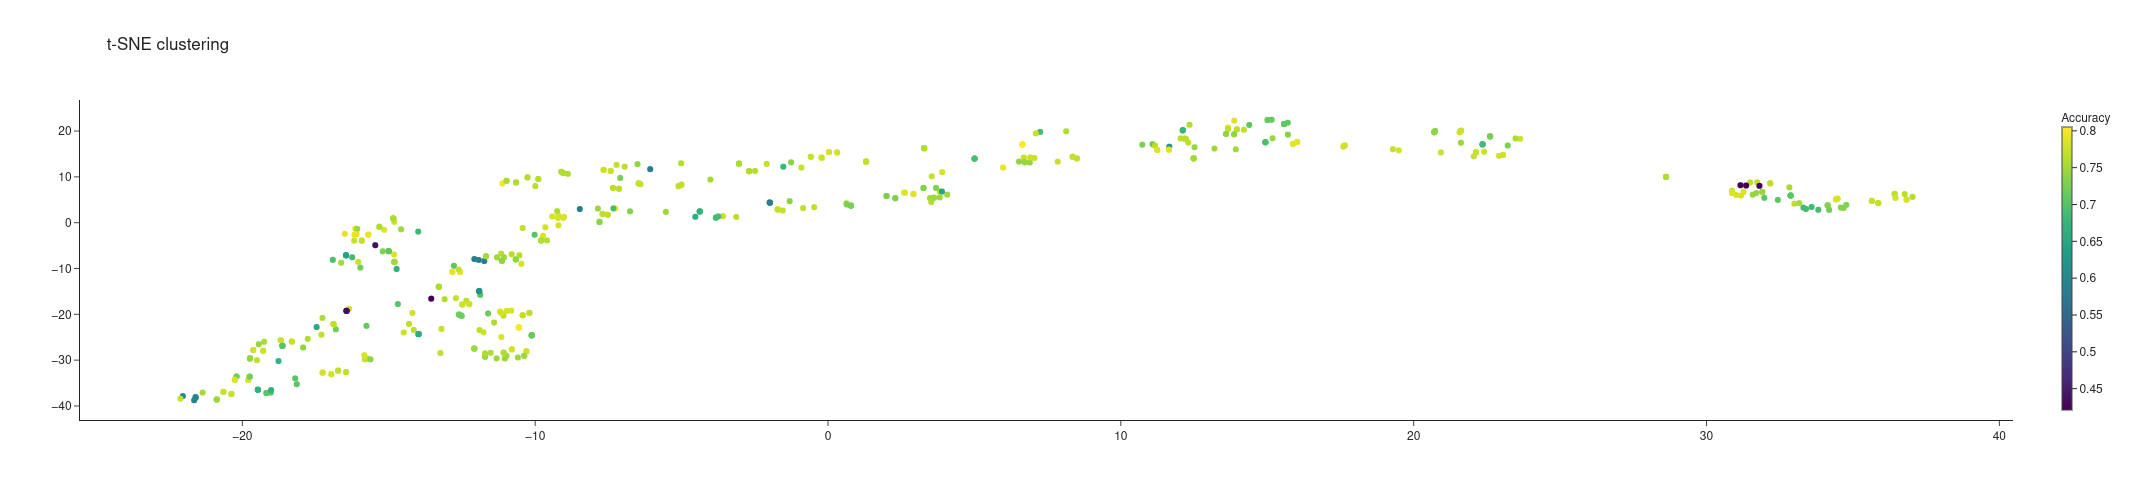

In [32]:
fig = go.Figure()
# fig.update_layout(layout)
fig.add_scatter(
    x=parameters_tsne[:, 0], y=parameters_tsne[:, 1], marker=dict(color=scores[good], colorscale='Viridis', colorbar=dict(thickness=10, title="Accuracy")), name="t-SNE",
    mode="markers"
)

fig.update_layout(height=500, width=1000, legend_x=0, legend_y=1.2, title_text="t-SNE clustering")

In [33]:
fig.write_image("../misc//t-SNE.pdf")
fig.write_image("../misc//t-SNE.svg")

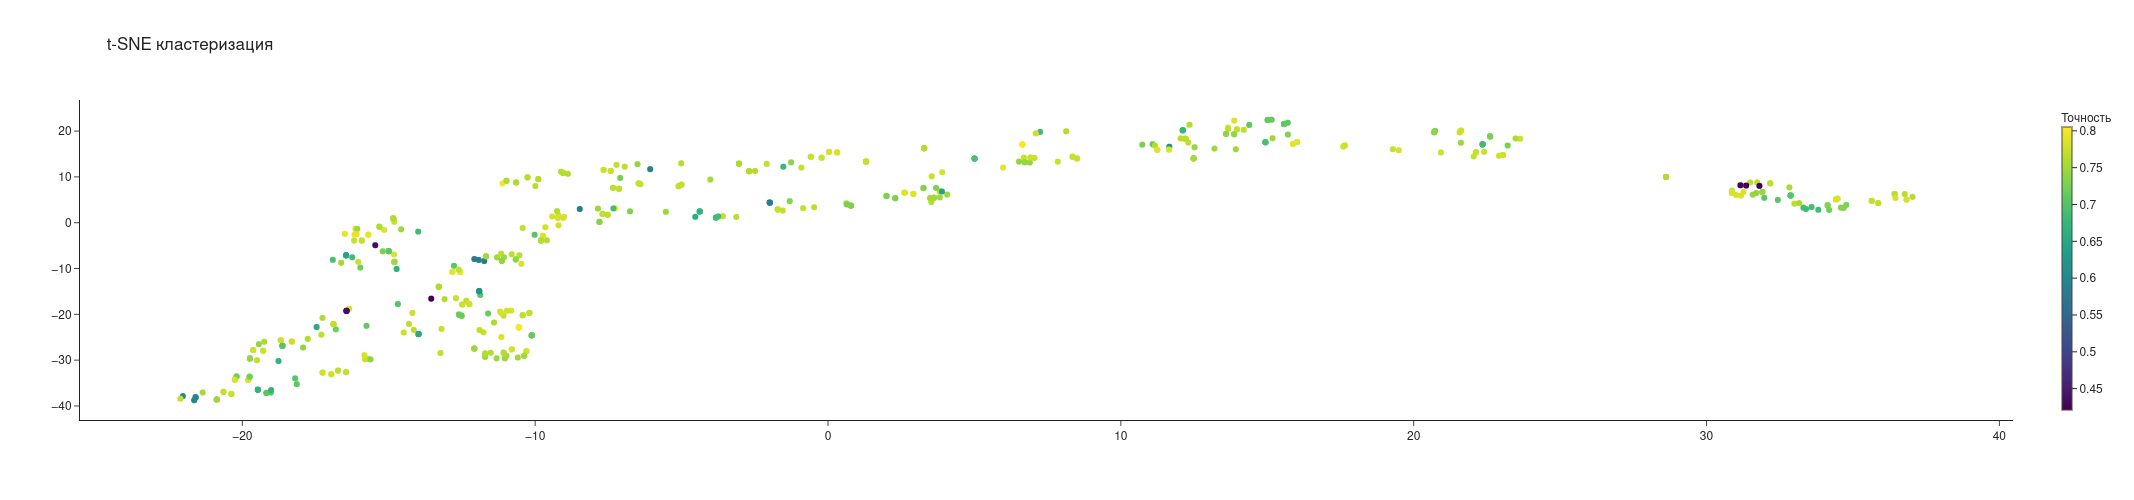

In [34]:
fig.update_layout(title_text="t-SNE кластеризация")
fig.data[0].marker.colorbar.title.text = "Точность"
fig

In [35]:
fig.write_image("../misc//t-SNE_ru.pdf")
fig.write_image("../misc//t-SNE_ru.svg")

In [28]:
pca.components_[0]

array([ 5.97575094e-04, -9.98738821e-01,  4.52990514e-02,  2.12605881e-02,
        4.03533266e-03, -3.32441471e-04, -1.24387053e-05])

In [29]:
pca.components_[1]

array([-5.01411435e-03, -1.65518171e-02, -7.00373561e-01,  7.13418470e-01,
        8.55723891e-03,  1.17733978e-02,  1.34883342e-04])

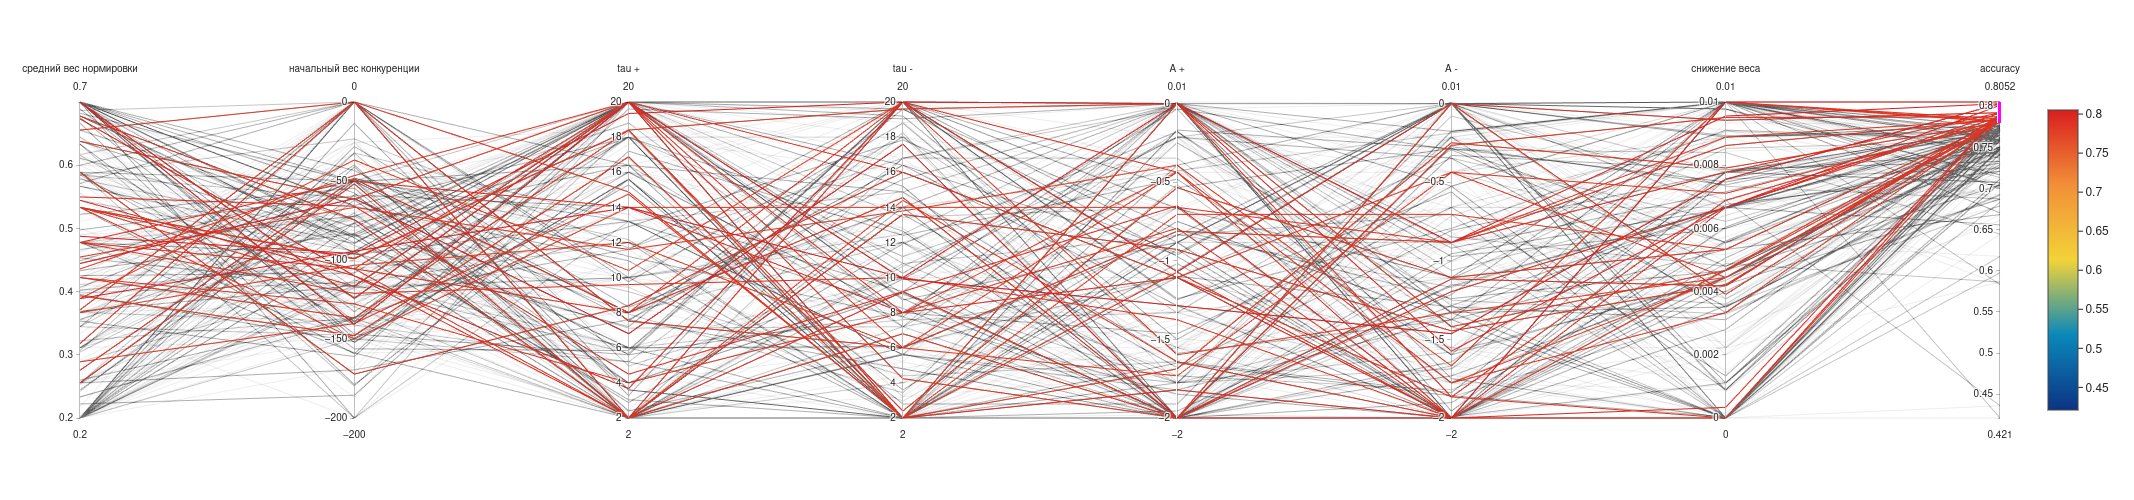

In [41]:
ru__labels = ["средний вес нормировки", "начальный вес конкуренции", "tau +", "tau -", "A +", "A -", "снижение веса"]

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = scores[good],
                   colorscale = 'portland',
                   showscale = True),
        dimensions = [
            dict(
                label=ru__labels[i],
                values = parameters[:, i][good], range=(parameters[:, i].min(), parameters[:, i].max())) for i in range(parameters.shape[1])
        ] + [dict(label="accuracy", values=scores[good], constraintrange=[0.78, max(scores)])]
    )
)
fig.update_layout(height=500, width=1200)

In [42]:
fig.write_image("../misc//hyperparams_ru.pdf")
fig.write_image("../misc//hyperparams_ru.svg")

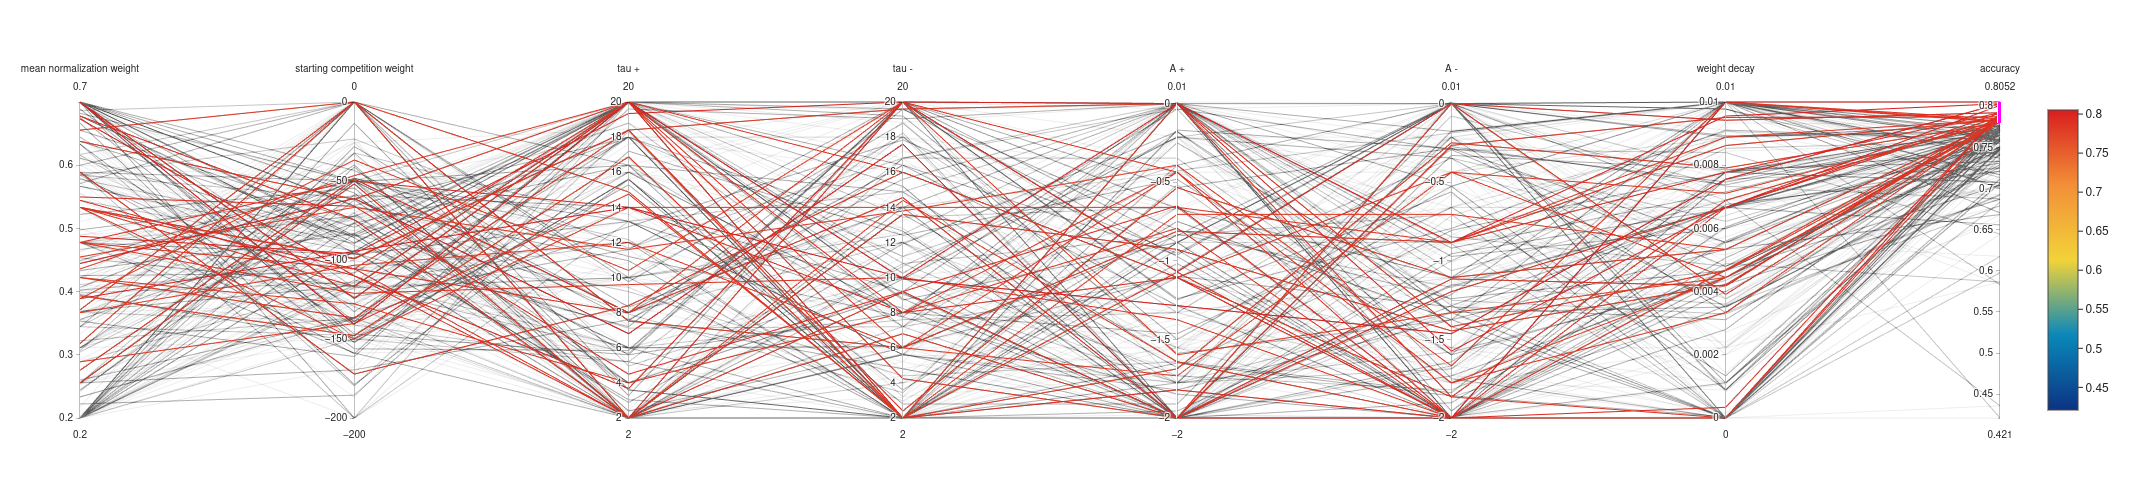

In [47]:
eng_labels = ["mean normalization weight", "starting competition weight", "tau +", "tau -", "A +", "A -", "weight decay"]
for dimension, eng_label in zip(fig.data[0].dimensions, eng_labels):
    dimension.label = eng_label
fig

In [48]:
fig.write_image("../misc//hyperparams.pdf")
fig.write_image("../misc//hyperparams.svg")

In [51]:
help(dimension)

Help on Dimension in module plotly.graph_objs.parcoords._dimension object:

class Dimension(plotly.basedatatypes.BaseTraceHierarchyType)
 |  Dimension(arg=None, constraintrange=None, label=None, multiselect=None, name=None, range=None, templateitemname=None, tickformat=None, ticktext=None, ticktextsrc=None, tickvals=None, tickvalssrc=None, values=None, valuessrc=None, visible=None, **kwargs)
 |  
 |  Base class for all types in the trace hierarchy
 |  
 |  Method resolution order:
 |      Dimension
 |      plotly.basedatatypes.BaseTraceHierarchyType
 |      plotly.basedatatypes.BasePlotlyType
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, arg=None, constraintrange=None, label=None, multiselect=None, name=None, range=None, templateitemname=None, tickformat=None, ticktext=None, ticktextsrc=None, tickvals=None, tickvalssrc=None, values=None, valuessrc=None, visible=None, **kwargs)
 |      Construct a new Dimension object
 |      
 |      The dimensions (var

In [42]:
b[worse] = a[worse]

In [43]:
print(a.mean(), a_.mean(), b.mean())

0.417213 0.496984 0.59059


In [52]:
from evolution import DifferentialEvolution, BOUNDS

In [53]:
df = DifferentialEvolution(func=None, population=np.load("parameters/0_.npy"), bounds=BOUNDS)

In [54]:
df.old_population = np.load("parameters/4.npy")
df.population = np.load("parameters/5.npy")
df.old_scores = np.load("scores/4.npy")
df.scores = np.load("scores/5.npy")

In [156]:
df.selection()

In [55]:
df.scores.mean()

0.7591279999999999

In [56]:
df.convergence

0.03621948036952905

In [113]:
np.save("parameters/2_.npy", df.population)

In [63]:
print(df.scores.mean())

0.7362089999999999


In [64]:
np.save("parameters/1.npy", df.population)

In [65]:
np.save("scores/1.npy", df.scores)

In [203]:
for i in range(4):
    print(np.load(f"scores/{i}.npy").mean(), np.load(f"scores/{i}_.npy").mean(), np.load(f"scores/{i+1}.npy").mean())

0.688142 0.63866 0.7362089999999999
0.7362089999999999 0.593889 0.737521
0.737521 0.525458 0.737521
0.737521 0.417213 0.737762


In [66]:
df.new_generation()

In [68]:
np.save("parameters/1_.npy", df.population)